In [51]:
import model_tools as mt
import sympy as sp
import pandas as pd


In [ ]:
#defining variables
h = 1
n_d = [1, 0]
t = 1

x, symbolic_n = sp.symbols('x, n')
p_a, p_r, p_i = sp.symbols('p_a, p_r, p_i')




1 1


In [44]:
def math_simulator(algorithm_output, height, branching_factor, threshold, p_accept, p_reject, p_ignore) -> pd.DataFrame:
    '''

    '''

    data = []
    data.append({
        'p_accept': p_accept,
        'p_reject': p_reject,
        'p_ignore': p_ignore,
        'height': height,
        'branching factor': branching_factor,
        'threshold': threshold,
        'algorithm output': algorithm_output
    })
    #df = pd.DataFrame(data)
    df = pd.DataFrame(data, columns = ['p_accept', 'p_reject', 'p_ignore', 'height', 'branching factor', 'threshold', 'algorithm output'])
    return df

In [48]:
dfs = []
for p_accept in range(0, 110, 10):

    remainder = 100 - p_accept
    for p_reject in range(0, remainder +10, 10):
        p_ignore = 100-p_reject-p_accept
        
        assert (p_accept + p_reject + p_ignore) == 100
        #p_response = [p_accept/100, p_reject/100, p_ignore/100]
        #prob_kwargs = p_response
        prob_kwargs = {'p_accept': p_accept/100, 'p_reject': p_reject/100, 'p_ignore': p_ignore/100}
        #print(prob_kwargs)
        prob_success = mt.prob_TCA_True(h, n_d, t, x, p_a, p_r, p_i, symbolic_n, prob_kwargs)
        #print(prob_success)
        df = math_simulator(prob_success, h, n_d, t, **prob_kwargs)
        
        dfs.append(df)     
combined_df = pd.concat(dfs)
print(combined_df)


    p_accept  p_reject  p_ignore  height branching factor  threshold  \
0        0.0       0.0       1.0       1           [1, 0]          1   
0        0.0       0.1       0.9       1           [1, 0]          1   
0        0.0       0.2       0.8       1           [1, 0]          1   
0        0.0       0.3       0.7       1           [1, 0]          1   
0        0.0       0.4       0.6       1           [1, 0]          1   
..       ...       ...       ...     ...              ...        ...   
0        0.8       0.1       0.1       1           [1, 0]          1   
0        0.8       0.2       0.0       1           [1, 0]          1   
0        0.9       0.0       0.1       1           [1, 0]          1   
0        0.9       0.1       0.0       1           [1, 0]          1   
0        1.0       0.0       0.0       1           [1, 0]          1   

     algorithm output  
0                   0  
0                   0  
0                   0  
0                   0  
0              

In [14]:
print(df["algorithm output"].dtype)
print(type(df["algorithm output"].iloc[0]))

df["algorithm output"] = df["algorithm output"].apply(float)

print(df["algorithm output"].dtype)
print(type(df["algorithm output"].iloc[0]))

object
<class 'sympy.core.numbers.Zero'>
float64
<class 'numpy.float64'>


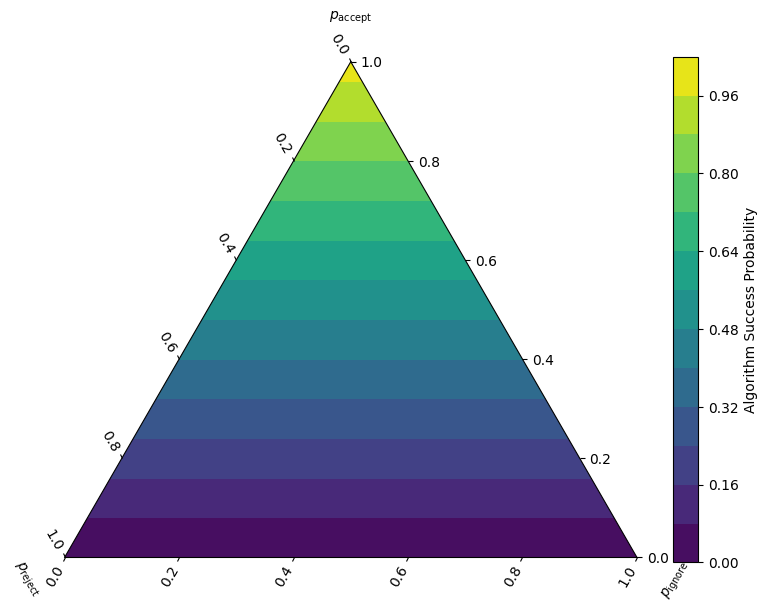

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpltern

# Load your dataframe (replace with your actual DataFrame if already loaded)
df = combined_df  # or df = pd.read_csv("your_file.csv")

df["algorithm output"] = df["algorithm output"].apply(float)

# Extract ternary coordinates
t = df["p_accept"].values  # top
l = df["p_reject"].values  # left
r = df["p_ignore"].values  # right
z = df["algorithm output"].values  # color value

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='ternary')

# Create the contour plot
tc = ax.tricontourf(t, l, r, z, levels=12, cmap='viridis')

# Label each corner
ax.set_tlabel(r'$p_{\text{accept}}$')
ax.set_llabel(r'$p_{\text{reject}}$')
ax.set_rlabel(r'$p_{\text{ignore}}$')

# Add color bar
fig.colorbar(tc, ax=ax, label="Algorithm Success Probability")

plt.tight_layout()
plt.show()



In [95]:
print(n_d)
print(h)

[1, 0]
5


In [103]:
dfs = []
for p_accept in range(0, 110, 10):

    remainder = 100 - p_accept
    for p_reject in range(0, remainder +10, 10):
        p_ignore = 100-p_reject-p_accept
        
        assert (p_accept + p_reject + p_ignore) == 100
        #p_response = [p_accept/100, p_reject/100, p_ignore/100]
        #prob_kwargs = p_response
        prob_kwargs = {'p_accept': p_accept/100, 'p_reject': p_reject/100, 'p_ignore': p_ignore/100}
        #print(prob_kwargs)
        prob_success = prob_TCA_True_normal_approx(height = 1, branching_factor=[1, 0], threshold=1, prob_kwargs=prob_kwargs)
        #print(prob_success)
        df = math_simulator(prob_success, height = 1, branching_factor=[1, 0], threshold=1, **prob_kwargs)
        
        dfs.append(df)     
noisy_combined_df = pd.concat(dfs)
print(noisy_combined_df)

    p_accept  p_reject  p_ignore  height branching factor  threshold  \
0        0.0       0.0       1.0       1           [1, 0]          1   
0        0.0       0.1       0.9       1           [1, 0]          1   
0        0.0       0.2       0.8       1           [1, 0]          1   
0        0.0       0.3       0.7       1           [1, 0]          1   
0        0.0       0.4       0.6       1           [1, 0]          1   
..       ...       ...       ...     ...              ...        ...   
0        0.8       0.1       0.1       1           [1, 0]          1   
0        0.8       0.2       0.0       1           [1, 0]          1   
0        0.9       0.0       0.1       1           [1, 0]          1   
0        0.9       0.1       0.0       1           [1, 0]          1   
0        1.0       0.0       0.0       1           [1, 0]          1   

    algorithm output  
0           0.000000  
0           0.000123  
0           0.001350  
0           0.002278  
0           0.002133

/var/folders/1c/d6dtqw7x0mv_fdygd5c2mggw0000gp/T/ipykernel_76426/279356674.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.88, 1])  # keep tight layout excluding colorbar


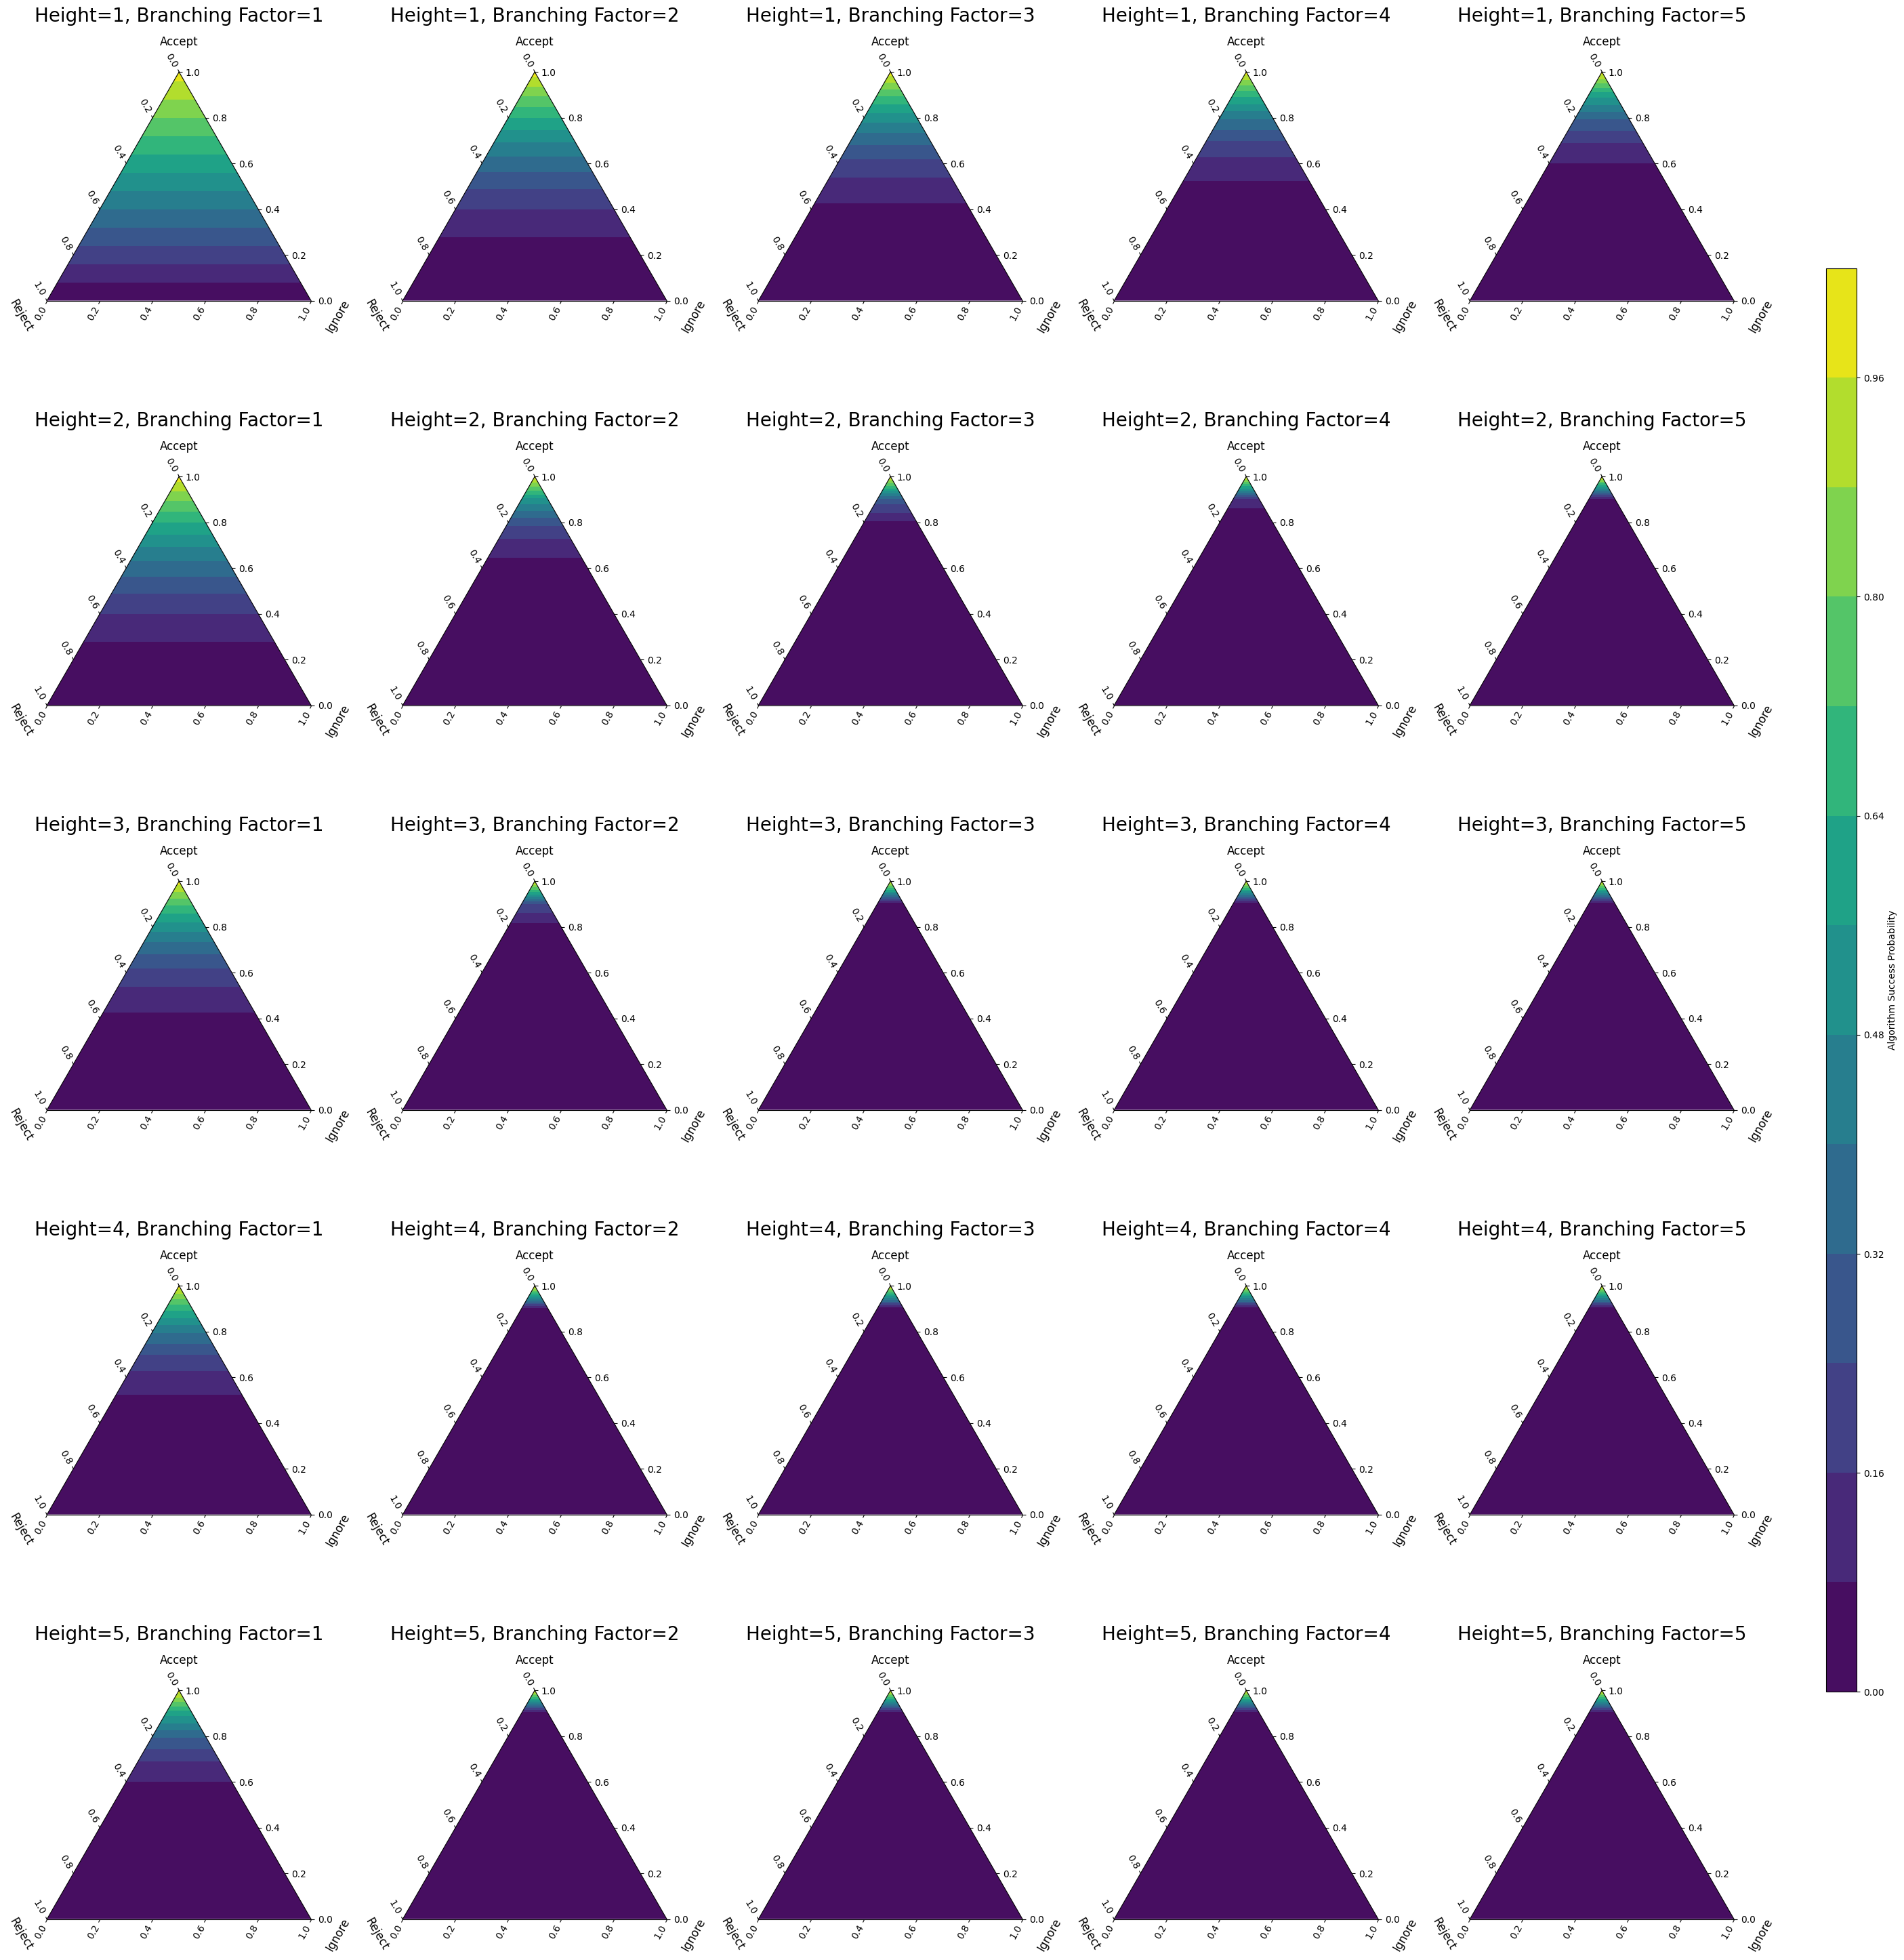

In [107]:

height_range = range(1, 6)
nd_range = range(1, 6)
threshold = 1

def simulator_runner(height:int, branching_factor:list, threshold:float, 
                    symbolic_x:sp.Symbol, symbolic_p_a:sp.Symbol, symbolic_p_r:sp.Symbol, symbolic_p_i:sp.Symbol, symbolic_n:sp.Symbol)-> pd.DataFrame:
    
    assert len(branching_factor) - 1 == height
    assert branching_factor[height] == 0

    dfs = []
    for p_accept in range(0, 110, 10):
        
        remainder = 100 - p_accept
        for p_reject in range(0, remainder +10, 10):
            p_ignore = 100-p_reject-p_accept
            
            assert (p_accept + p_reject + p_ignore) == 100
            
            #prob_kwargs = p_response
            prob_kwargs = {'p_accept': p_accept/100, 'p_reject': p_reject/100, 'p_ignore': p_ignore/100}
            #print(prob_kwargs)
            prob_success = mt.prob_TCA_True(height, branching_factor, threshold, symbolic_x, symbolic_p_a, symbolic_p_r, symbolic_p_i, symbolic_n, prob_kwargs)
            #print(prob_success)
            df = math_simulator(prob_success, height, branching_factor, threshold, **prob_kwargs)
            
            dfs.append(df)     
    combined_df = pd.concat(dfs)
    combined_df["algorithm output"] = combined_df["algorithm output"].apply(float)
    #print(combined_df)
    return combined_df



# Create the plot
fig, axes = plt.subplots(len(height_range), len(nd_range), figsize=(30, 30), subplot_kw=dict(projection='ternary'))

for i, h in enumerate(height_range):
    for j, n_i in enumerate(nd_range):
        ax = axes[i, j]
        
        branching_factor = [n_i for _ in range(h)]
        branching_factor.append(0)
        df = simulator_runner(h, branching_factor, threshold, x, p_a, p_r, p_i, symbolic_n)

        #change to correct variables
        t, l, r, c = df["p_accept"].values, df["p_reject"].values, df["p_ignore"].values, df["algorithm output"].values
        tc = ax.tricontourf(t, l, r, c, levels=12, cmap='viridis')
        ax.set_title(f"Height={h}, Branching Factor={n_i}", fontsize=20, pad=15)

        ax.set_tlabel("Accept", fontsize=12)
        ax.set_llabel("Reject", fontsize=12)
        ax.set_rlabel("Ignore", fontsize=12)
        

# Add shared colorbar
fig.subplots_adjust(right=0.88)  # leave room on the right
cbar_ax = fig.add_axes([0.90, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
fig.colorbar(tc, cax=cbar_ax, label='Algorithm Success Probability')

plt.tight_layout(rect=[0, 0, 0.88, 1])  # keep tight layout excluding colorbar
plt.show()

In [64]:
for i, h in enumerate(height_range):
    print('i', i, 'h', h)
    for j, n_i in enumerate(nd_range):
        print('j', j, 'n_i', n_i)
        branching_factor = [n_i for _ in range(h)]
        branching_factor.append(0)
        print('Branching Factor: ', branching_factor)




i 0 h 1
j 0 n_i 1
Branching Factor:  [1, 0]
j 1 n_i 2
Branching Factor:  [2, 0]
j 2 n_i 3
Branching Factor:  [3, 0]
j 3 n_i 4
Branching Factor:  [4, 0]
j 4 n_i 5
Branching Factor:  [5, 0]
i 1 h 2
j 0 n_i 1
Branching Factor:  [1, 1, 0]
j 1 n_i 2
Branching Factor:  [2, 2, 0]
j 2 n_i 3
Branching Factor:  [3, 3, 0]
j 3 n_i 4
Branching Factor:  [4, 4, 0]
j 4 n_i 5
Branching Factor:  [5, 5, 0]
i 2 h 3
j 0 n_i 1
Branching Factor:  [1, 1, 1, 0]
j 1 n_i 2
Branching Factor:  [2, 2, 2, 0]
j 2 n_i 3
Branching Factor:  [3, 3, 3, 0]
j 3 n_i 4
Branching Factor:  [4, 4, 4, 0]
j 4 n_i 5
Branching Factor:  [5, 5, 5, 0]
i 3 h 4
j 0 n_i 1
Branching Factor:  [1, 1, 1, 1, 0]
j 1 n_i 2
Branching Factor:  [2, 2, 2, 2, 0]
j 2 n_i 3
Branching Factor:  [3, 3, 3, 3, 0]
j 3 n_i 4
Branching Factor:  [4, 4, 4, 4, 0]
j 4 n_i 5
Branching Factor:  [5, 5, 5, 5, 0]
i 4 h 5
j 0 n_i 1
Branching Factor:  [1, 1, 1, 1, 1, 0]
j 1 n_i 2
Branching Factor:  [2, 2, 2, 2, 2, 0]
j 2 n_i 3
Branching Factor:  [3, 3, 3, 3, 3, 0]
j 3 n_